# 🧠 Brain Tumor Prediction Using MRI Scans

hey this notboook conatin the brain tumor prediction using the mri scanw data frowm kaggle you can download the data from this link 
---

## 📥 Dataset
👉 [Brain Tumor MRI Dataset on Kaggle](https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset)
after downloading the data move to the directory where is your notebook is located after this run the nootboook 

## tecnologies used here is
.tenserrflow
.sklearn
.python
.mri image data

## purpose
this  project in real life  it can be used for predicting any patient have tumor or not the patient can predict thier mri scan images if they contain tumor or not this can save many lifes of people


In [2]:

import os

directory_path = r'archive\Testing'

# Check if the directory exists
if os.path.exists(directory_path):
    print(f"Directory found: {directory_path}")
    # List the contents of the directory
    print("Contents of the directory:")
    for item in os.listdir(directory_path):
        print(item)
else:
    print(f"Directory not found: {directory_path}")

Directory found: archive\Testing
Contents of the directory:
glioma
meningioma
notumor
pituitary


**check for the image**


In [3]:
import os

subdirectory_path = r'archive\Testing' # Check one of the subdirectories

# Check if the subdirectory exists
if os.path.exists(subdirectory_path):
    print(f"Subdirectory found: {subdirectory_path}")
    # List the contents of the subdirectory
    print("Contents of the subdirectory:")
    for item in os.listdir(subdirectory_path):
        print(item)
else:
    print(f"Subdirectory not found: {subdirectory_path}")



Subdirectory found: archive\Testing
Contents of the subdirectory:
glioma
meningioma
notumor
pituitary


**create the dataset**


In [4]:
import pandas as pd
import numpy as np
from PIL import  Image

def load_dataset(directory_path):
    x=[]
    y=[]
    for name_dir in os.listdir(directory_path):
        label_name=name_dir
        for image_data in os.listdir(os.path.join(directory_path,name_dir)):
            image_path=Image.open(os.path.join(directory_path,name_dir,image_data))
            image_path=image_path.convert("L")
            image_path=image_path.resize((150,150))
            x.append(np.array(image_path,dtype=np.float32)/255.0)
            y.append(label_name)
    return np.stack(x),np.array(y)


x,y=load_dataset(r'archive\Testing')


    


**map the labels**

In [5]:

map_tumor={"glioma":0,"meningioma":1,"notumor":2,"pituitary":3}
y=np.array([map_tumor[i] for i in y])

num_samples=x.shape[0]
x=x.reshape(num_samples,150,150,1)




**split the dataset**

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)




In [ ]:







for i in range(1):
    print(x[i].shape)
    print(x[i])
    print(y[i])
    plt.imshow(x[i])
    plt.show()



SyntaxError: invalid syntax (444565516.py, line 1)

In [112]:
print(type(y))



<class 'numpy.ndarray'>


In [113]:
x.shape

(1311, 150, 150, 1)

**model defination**

In [114]:

"""from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])"""
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')  # ✅ 4 neurons for 4 classes
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # or 'categorical_crossentropy' if one-hot
    metrics=['accuracy']
)



**model checkpoint**

In [115]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    filepath='best_model.h5',        # or 'best_model.keras' for TF2.12+
    monitor='val_loss',              # or 'val_accuracy'
    save_best_only=True,
    mode='min',                      # 'min' for loss, 'max' for accuracy
    verbose=1
)



**train the model**

In [116]:

history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=50,
    callbacks=[checkpoint]
)



Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.3259 - loss: 1.4808
Epoch 1: val_loss improved from inf to 0.82703, saving model to best_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 18s 477ms/step - accuracy: 0.3291 - loss: 1.4733 - val_accuracy: 0.6844 - val_loss: 0.8270
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - accuracy: 0.7220 - loss: 0.6898
Epoch 2: val_loss improved from 0.82703 to 0.58726, saving model to best_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 489ms/step - accuracy: 0.7229 - loss: 0.6884 - val_accuracy: 0.7719 - val_loss: 0.5873
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step - accuracy: 0.8383 - loss: 0.4441
Epoch 3: val_loss improved from 0.58726 to 0.55971, saving model to best_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 17s 521ms/step - accuracy: 0.8385 - loss: 0.4436 - val_accuracy: 0.7833 - val_loss: 0.5597
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 503ms/step - accuracy: 0.9259 - loss: 0.2343
Epoch 4: val_loss improved from 0.55971 to 0.48514, saving model to best_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 18s 543ms/step - accuracy: 0.9255 - loss: 0.2347 - val_accuracy: 0.8251 - val_loss: 0.4851
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.9714 - loss: 0.1317
Epoch 5: val_loss did not improve from 0.48514
33/33 ━━━━━━━━━━━━━━━━━━━━ 18s 467ms/step - accuracy: 0.9713 - loss: 0.1314 - val_accuracy: 0.8365 - val_loss: 0.5452
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step - accuracy: 0.9822 - loss: 0.0704
Epoch 6: val_loss did not improve from 0.48514
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 481ms/step - accuracy: 0.9822 - loss: 0.0704 - val_accuracy: 0.8365 - val_loss: 0.5628
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step - accuracy: 0.9936 - loss: 0.0444
Epoch 7: val_loss did not improve from 0.48514
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 489ms/step - accuracy: 0.9934 - loss: 0.0445 - val_accuracy: 0.8213 - val_loss: 0.6211
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.9965 - loss: 0.0265
Epoch 8: val_loss did not improve from 0.48

**load the model**

In [118]:



from tensorflow.keras.models import load_model

best_model = load_model('best_model.h5')





In [119]:
loss, acc = best_model.evaluate(x_test, y_test)
print(f"Best model test accuracy: {acc}")




9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.8410 - loss: 0.4582
Best model test accuracy: 0.8250950574874878


**test the model using one of the image of dataset**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


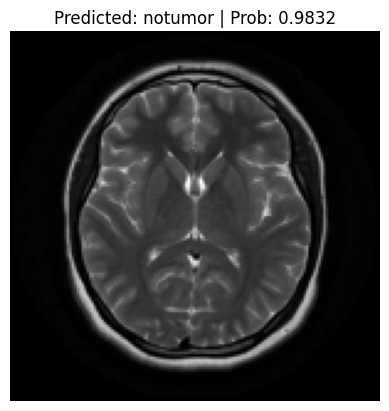

Prediction: notumor
Probabilities: [0.00373318 0.00590998 0.9832465  0.00711033]


In [ ]:

def imout(image_path, model, class_map=None, show_image=True):
    """
    Load an image, preprocess, predict class, and optionally display.

    Args:
        image_path (str): Path to the input image.
        model (tf.keras.Model): Trained Keras model.
        class_map (dict): Optional mapping from label name to index. If provided, will invert for name lookup.
        show_image (bool): Whether to display the input image.

    Returns:
        predicted_label (str or int): The predicted class index or label name.
        probabilities (np.ndarray): Softmax probabilities for each class.
    """
    # Load & preprocess image
    img = Image.open(image_path).convert('L').resize((150, 150))
    arr = np.array(img, dtype=np.float32) / 255.0
    arr = arr.reshape(1, 150, 150, 1)

    # Predict
    probs = model.predict(arr)[0]
    pred_idx = np.argmax(probs)

    # Map back to label name if class_map provided
    if class_map is not None:
        inv_map = {v: k for k, v in class_map.items()}
        pred_label = inv_map.get(pred_idx, pred_idx)
    else:
        pred_label = pred_idx

    # Show image
    if show_image:
        plt.imshow(arr.squeeze(), cmap='gray')
        plt.title(f"Predicted: {pred_label} | Prob: {probs[pred_idx]:.4f}")
        plt.axis('off')
        plt.show()

    return pred_label, probs

# Example usage:
result_label, result_probs = imout(
     r'archive\Testing\glioma\Te-gl_0012.jpg',
     best_model,
     class_map=map_tumor
 )
print("Prediction:", result_label)
print("Probabilities:", result_probs)




